In [1]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import glob
%matplotlib inline

In [2]:
meta_df = pd.read_csv("../data/meta.tsv",sep="\t", index_col=0)
meta_df

Timepoint Stimuli  Sample Genotype
0_2G3              3       G       2       WT
1_2G3              3       G       2       WT
2_2G3              3       G       2       WT
3_2G3              3       G       2       WT
4_2G3              3       G       2       WT
...              ...     ...     ...      ...
4592_4B46         46       B       4       WT
4593_4B46         46       B       4       WT
4594_4B46         46       B       4       WT
4595_4B46         46       B       4       WT
4596_4B46         46       B       4       WT

[25577941 rows x 4 columns]

../results/umap_out/embedding_2_100_0.1.p
../results/umap_out/embedding_0_10_0.p
../results/umap_out/embedding_0_5_0.1.p
../results/umap_out/embedding_0_15_0.1.p
../results/umap_out/embedding_0_3_0.1.p
../results/umap_out/embedding_0_100_0.p
../results/umap_out/embedding_1_5_0.1.p
../results/umap_out/embedding_2_3_0.1.p
../results/umap_out/embedding_0_100_0.1.p
../results/umap_out/embedding_1_3_0.p
../results/umap_out/embedding_0_15_0.p


/home/isshamie/software/anaconda2/envs/umap/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


../results/umap_out/embedding_2_15_0.1.p
../results/umap_out/embedding_2_5_0.1.p
../results/umap_out/embedding_2_3_0.p
../results/umap_out/embedding_1_10_0.1.p
../results/umap_out/embedding_0_3_0.p
../results/umap_out/embedding_1_5_0.p
../results/umap_out/embedding_1_100_0.p
../results/umap_out/embedding_0_5_0.p
../results/umap_out/embedding_2_10_0.1.p
../results/umap_out/embedding_1_3_0.1.p
../results/umap_out/embedding_2_10_0.p
../results/umap_out/embedding_1_15_0.1.p
../results/umap_out/embedding_1_100_0.1.p
../results/umap_out/embedding_1_10_0.p
../results/umap_out/embedding_2_15_0.p
../results/umap_out/embedding_0_10_0.1.p
../results/umap_out/embedding_2_5_0.p
../results/umap_out/embedding_2_100_0.p
../results/umap_out/embedding_1_15_0.p


<Figure size 432x288 with 0 Axes>

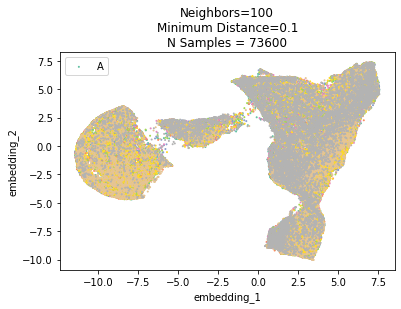

<Figure size 432x288 with 0 Axes>

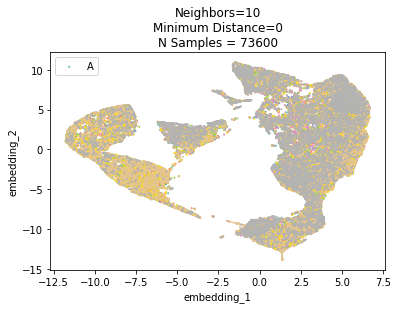

<Figure size 432x288 with 0 Axes>

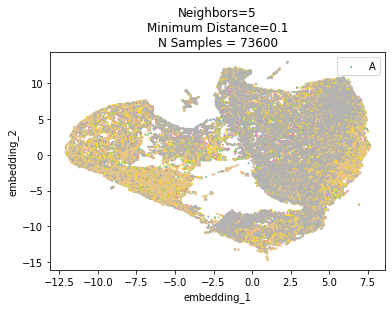

<Figure size 432x288 with 0 Axes>

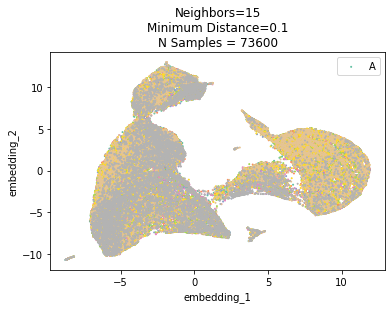

<Figure size 432x288 with 0 Axes>

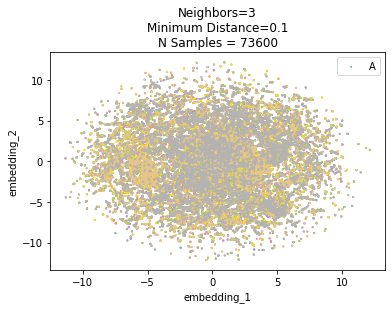

<Figure size 432x288 with 0 Axes>

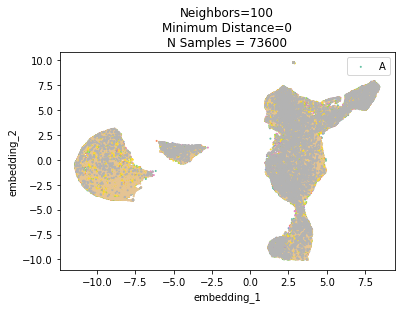

<Figure size 432x288 with 0 Axes>

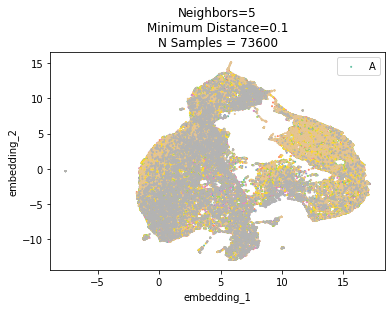

<Figure size 432x288 with 0 Axes>

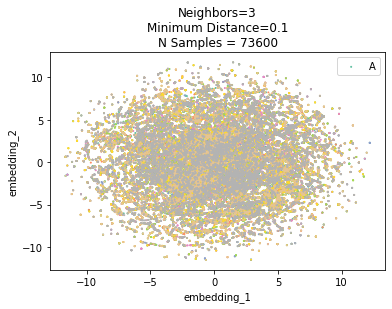

<Figure size 432x288 with 0 Axes>

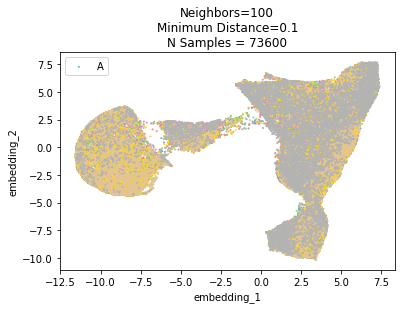

<Figure size 432x288 with 0 Axes>

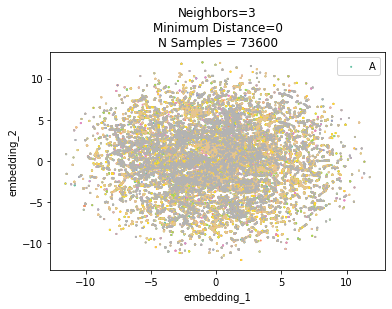

<Figure size 432x288 with 0 Axes>

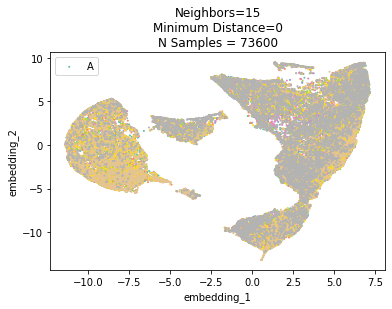

<Figure size 432x288 with 0 Axes>

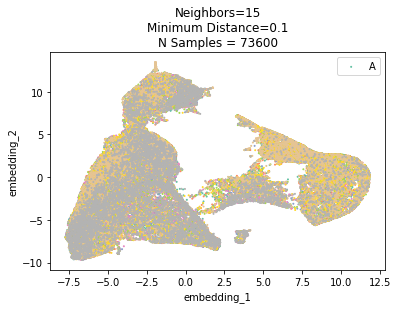

<Figure size 432x288 with 0 Axes>

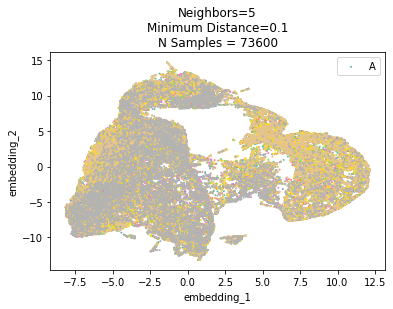

<Figure size 432x288 with 0 Axes>

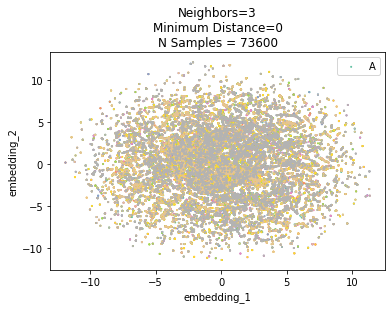

<Figure size 432x288 with 0 Axes>

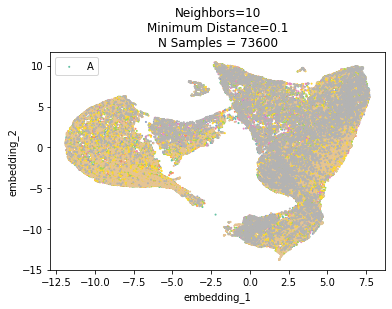

<Figure size 432x288 with 0 Axes>

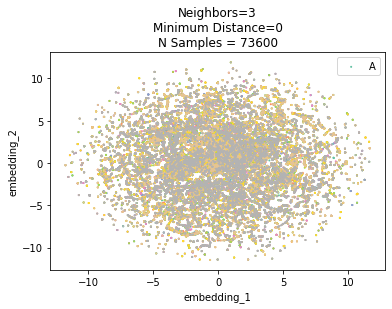

<Figure size 432x288 with 0 Axes>

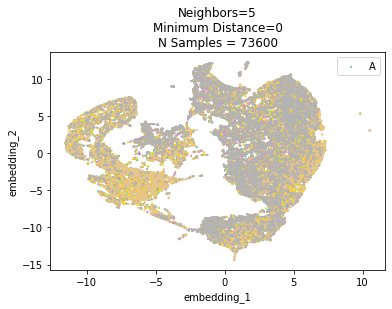

<Figure size 432x288 with 0 Axes>

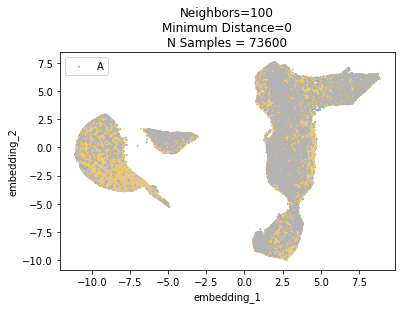

<Figure size 432x288 with 0 Axes>

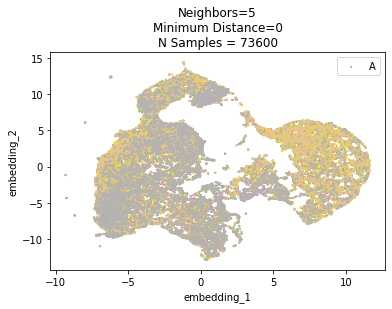

<Figure size 432x288 with 0 Axes>

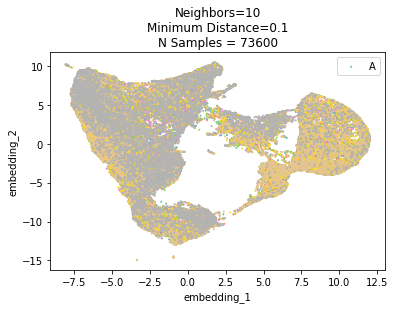

<Figure size 432x288 with 0 Axes>

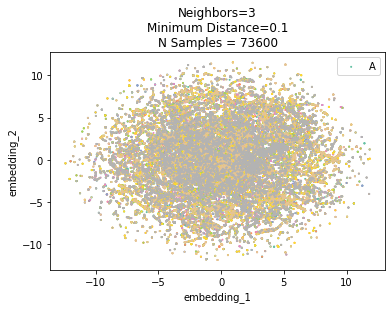

<Figure size 432x288 with 0 Axes>

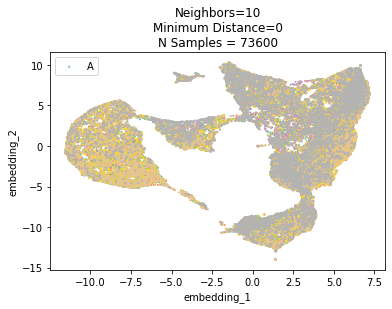

<Figure size 432x288 with 0 Axes>

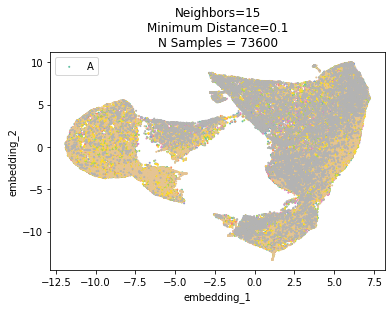

<Figure size 432x288 with 0 Axes>

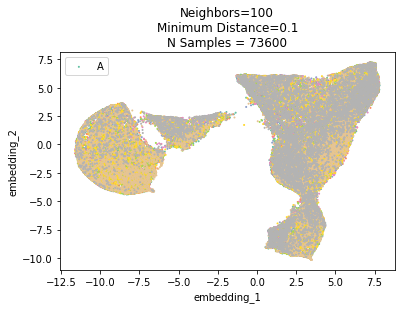

<Figure size 432x288 with 0 Axes>

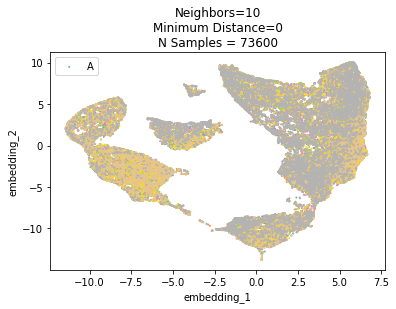

<Figure size 432x288 with 0 Axes>

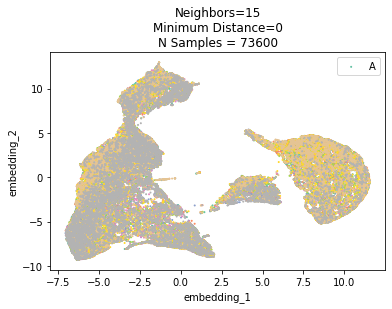

<Figure size 432x288 with 0 Axes>

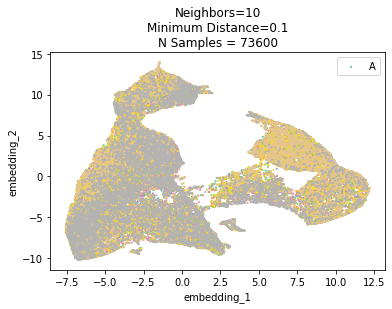

<Figure size 432x288 with 0 Axes>

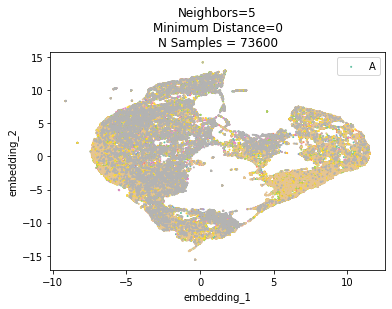

<Figure size 432x288 with 0 Axes>

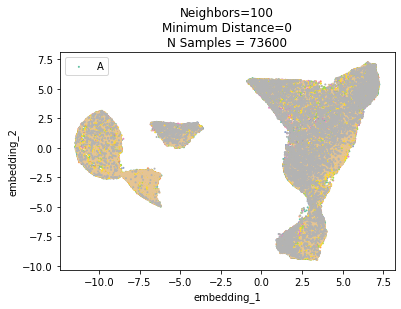

<Figure size 432x288 with 0 Axes>

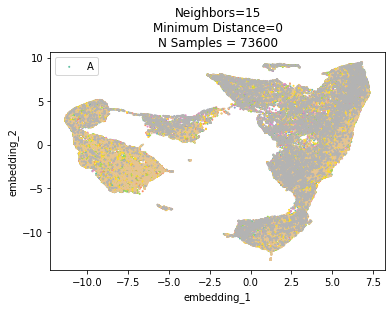

In [44]:
for curr_param in glob.glob("../results/umap_out/*p"):
    print(curr_param)
    inp = pickle.load(open(curr_param,"rb"))
    if not len(inp) == 2:
        continue
    embedding,samples_inds = inp[0], inp[1]
    curr_df = meta_df.loc[samples_inds]
    curr_df["embedding_1"] = embedding[:,0]
    curr_df["embedding_2"] = embedding[:,1]
    
    color_labels = curr_df["Stimuli"].unique()
    rgb_values = (sns.color_palette("Set2", len(color_labels)))
    color_map = dict(zip(color_labels, rgb_values))

    plt.figure(figsize=(15,15))
    pallete=sns.color_palette("bright", len(color_labels))
    sns.scatterplot(data=curr_df,x="embedding_1", y="embedding_2", palette=pallete, hue='Stimuli',style="Genotype",
                    size=0.5)
    
    curr_df.plot.scatter("embedding_1","embedding_2",c=curr_df['Stimuli'].map(color_map),s=1)
    plt.legend()
    neigh = curr_param.strip(".p").split("_")[-2]
    dist = curr_param.strip(".p").split("_")[-1]
    plt.title(f"Neighbors={neigh}\nMinimum Distance={dist}\nN Samples = {len(embedding)}")


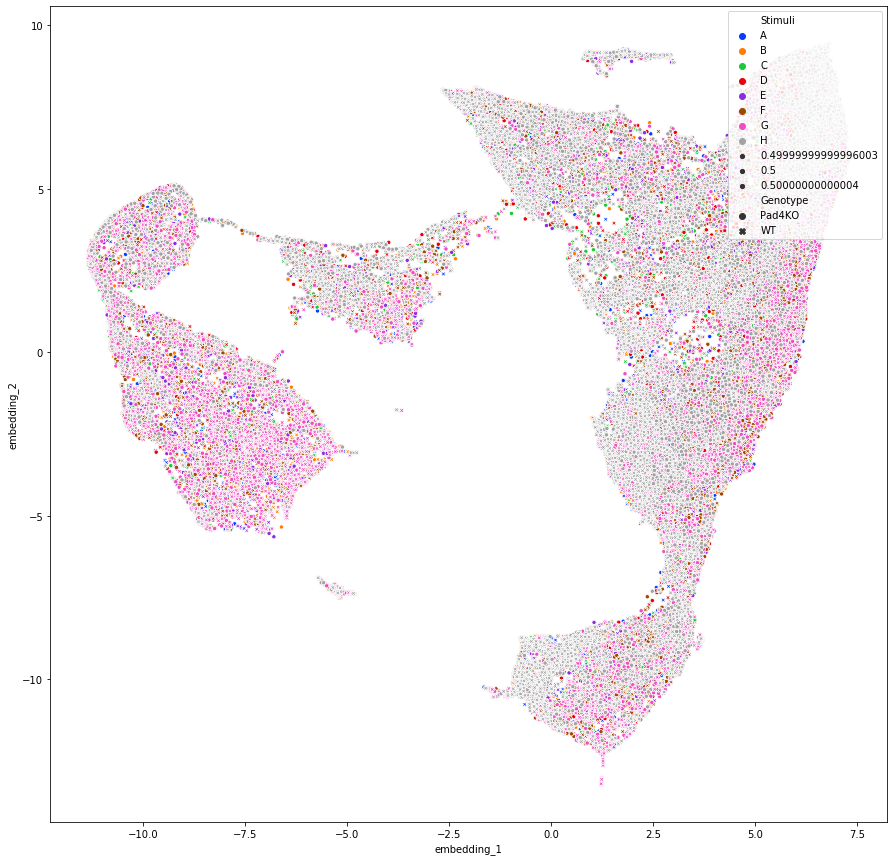

In [76]:
plt.figure(figsize=(15,15))
pallete=sns.color_palette("bright", len(color_labels))
sns.scatterplot(data=curr_df,x="embedding_1", y="embedding_2", palette=pallete, hue='Stimuli',style="Genotype",
                        size=0.5)
#curr_df.plot.scatter("embedding_1","embedding_2", hue=curr_df['Stimuli'])#.map(color_map),s=0.5)
plt.legend(loc='upper right')

## Plot feature values on top

In [77]:
raw = pd.read_csv("../fc.tsv",sep="\t", index_col=0)
raw = raw.drop(["Timepoint","Stimuli","Sample"],axis=1)
raw

Timepoint Stimuli  Sample  Cell Size  Cell Circularity  \
0_2G3              3       G       2      11750          113.2539   
1_2G3              3       G       2         61          512.9727   
2_2G3              3       G       2         12         2565.8500   
3_2G3              3       G       2         23         1351.6133   
4_2G3              3       G       2          2        10000.0000   
...              ...     ...     ...        ...               ...   
4592_4B46         46       B       4        216         9413.2491   
4593_4B46         46       B       4        370         4905.5990   
4594_4B46         46       B       4        157         8635.1936   
4595_4B46         46       B       4         19        10000.0000   
4596_4B46         46       B       4        143         6346.1027   

           Cell Aspect Ratio  Cell Tracker Intensity  PI Intensity  \
0_2G3                 2.8375              21192.0999     2951.6684   
1_2G3                61.0000              17836.5246     2907.2951   
2_2G3                12.0000              18353.1667     2925.5833   
3_2G3                23.0000              19101.6087     2961.4783   
4_2G3                 2.0000              19001.0000     2935.5000   
...                      ...                     ...           ...   
4592_4B46             1.0487              14314.2315     4481.2037   
4593_4B46             3.0213              12515.4270     6447.3568   
4594_4B46             1.4828              14121.9427    15047.1401   
4595_4B46             1.2733              20725.6316    46356.0526   
4596_4B46             2.5904              12771.9371     4949.9021   

           AnexinV Intensity  
0_2G3             10590.6212  
1_2G3              8491.5246  
2_2G3              8690.5833  
3_2G3              8673.8261  
4_2G3              8735.5000  
...                      ...  
4592_4B46         27472.5972  
4593_4B46         29679.3784  
4594_4B46         26821.1465  
4595_4B46         26550.7895  
4596_4B46         25461.1259  

[25577941 rows x 9 columns]

In [83]:
curr_df = pd.merge(curr_df, raw,how='inner',left_index=True, right_index=True)

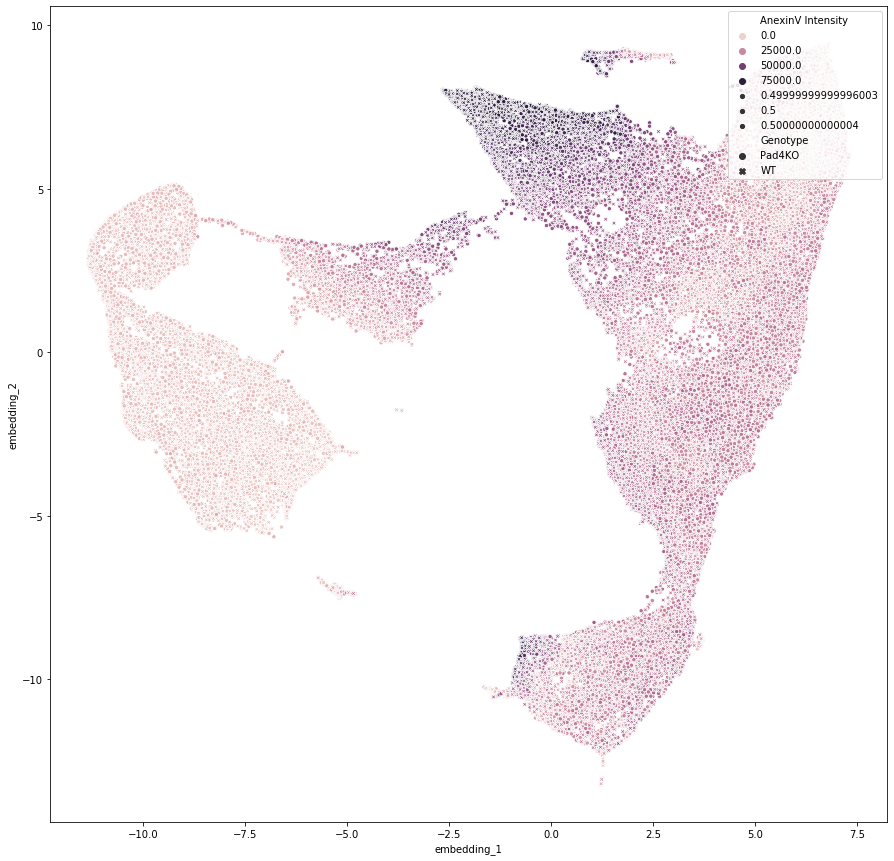

In [87]:
plt.figure(figsize=(15,15))
pallete=sns.color_palette("bright", len(color_labels))
sns.scatterplot(data=curr_df,x="embedding_1", y="embedding_2", hue='AnexinV Intensity',
                style="Genotype", size=0.5)
#curr_df.plot.scatter("embedding_1","embedding_2", hue=curr_df['Stimuli'])#.map(color_map),s=0.5)
plt.legend(loc='upper right')

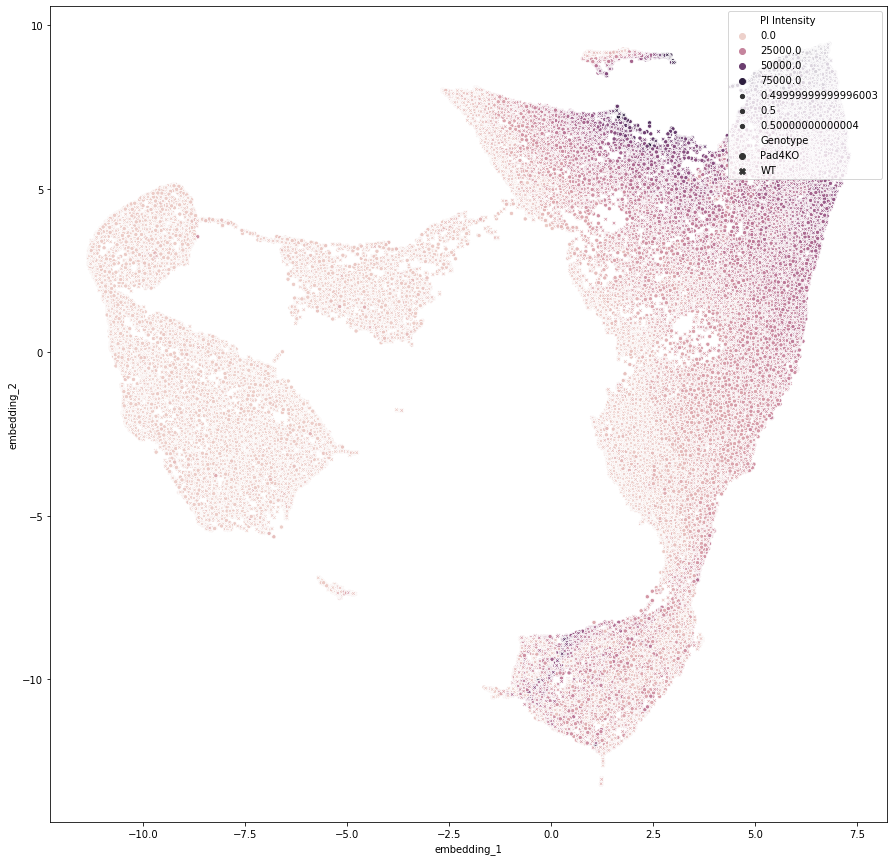

In [88]:
plt.figure(figsize=(15,15))
pallete=sns.color_palette("bright", len(color_labels))
sns.scatterplot(data=curr_df,x="embedding_1", y="embedding_2", hue='PI Intensity',
                style="Genotype", size=0.5)
#curr_df.plot.scatter("embedding_1","embedding_2", hue=curr_df['Stimuli'])#.map(color_map),s=0.5)
plt.legend(loc='upper right')

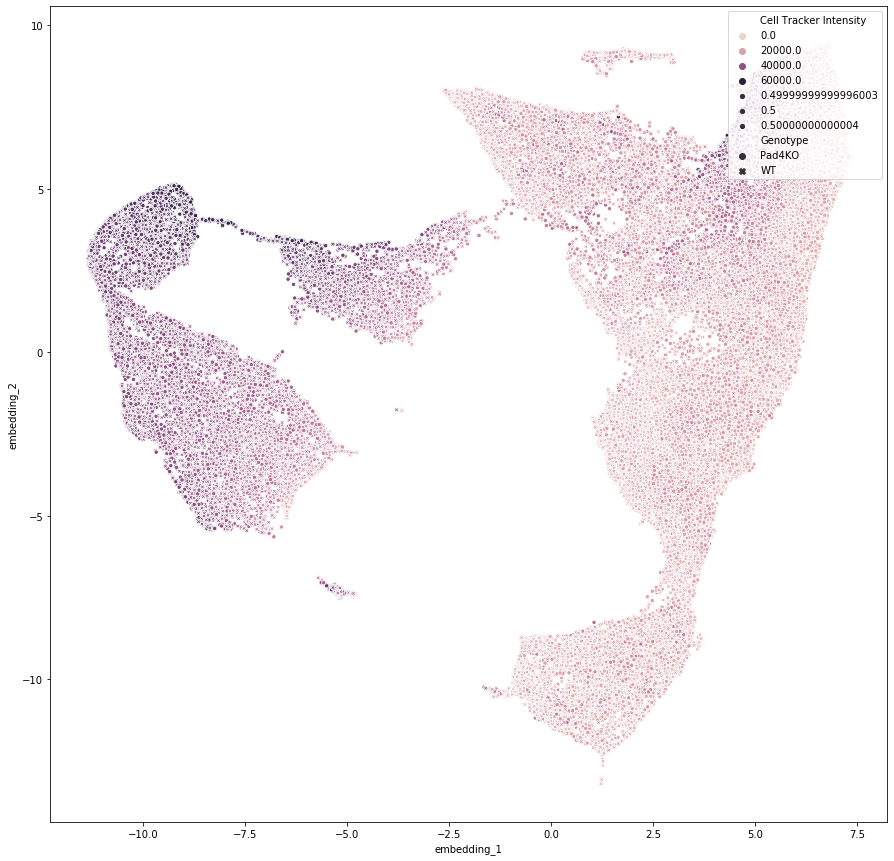

In [91]:
plt.figure(figsize=(15,15))
pallete=sns.color_palette("bright", len(color_labels))
sns.scatterplot(data=curr_df,x="embedding_1", y="embedding_2", hue='Cell Tracker Intensity',
                style="Genotype", size=0.5)
#curr_df.plot.scatter("embedding_1","embedding_2", hue=curr_df['Stimuli'])#.map(color_map),s=0.5)
plt.legend(loc='upper right')

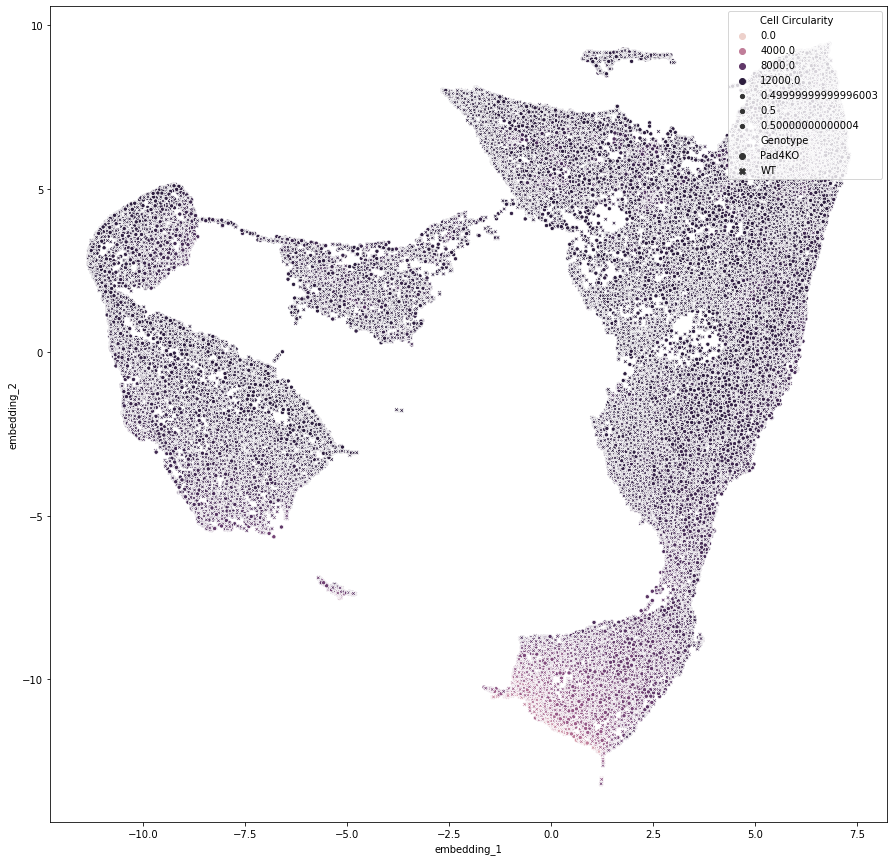

In [89]:
plt.figure(figsize=(15,15))
pallete=sns.color_palette("bright", len(color_labels))
sns.scatterplot(data=curr_df,x="embedding_1", y="embedding_2", hue='Cell Circularity',
                style="Genotype", size=0.5)
#curr_df.plot.scatter("embedding_1","embedding_2", hue=curr_df['Stimuli'])#.map(color_map),s=0.5)
plt.legend(loc='upper right')

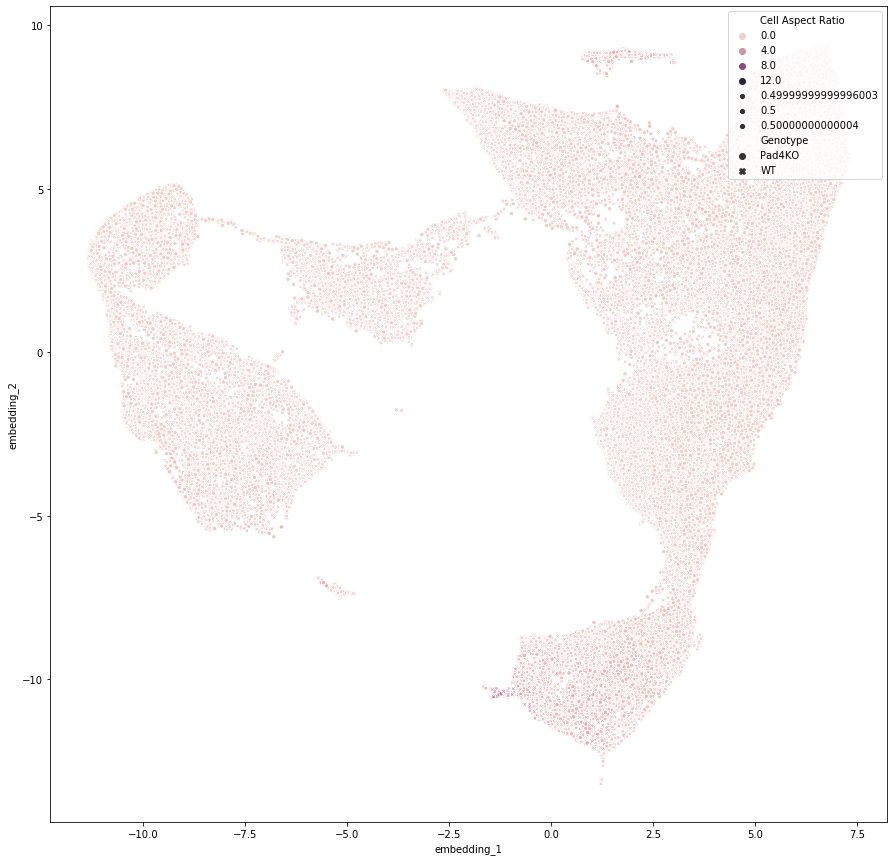

In [90]:
plt.figure(figsize=(15,15))
pallete=sns.color_palette("bright", len(color_labels))
sns.scatterplot(data=curr_df,x="embedding_1", y="embedding_2", hue='Cell Aspect Ratio',
                style="Genotype", size=0.5)
#curr_df.plot.scatter("embedding_1","embedding_2", hue=curr_df['Stimuli'])#.map(color_map),s=0.5)
plt.legend(loc='upper right')

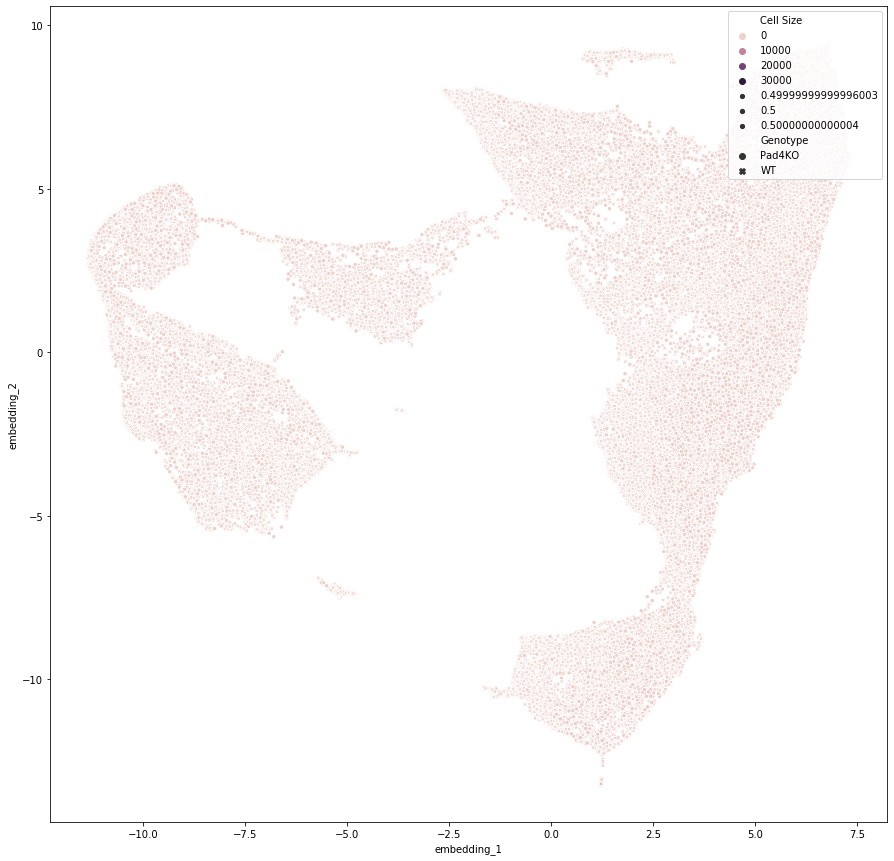

In [92]:
plt.figure(figsize=(15,15))
pallete=sns.color_palette("bright", len(color_labels))
sns.scatterplot(data=curr_df,x="embedding_1", y="embedding_2", hue='Cell Size',
                style="Genotype", size=0.5)
#curr_df.plot.scatter("embedding_1","embedding_2", hue=curr_df['Stimuli'])#.map(color_map),s=0.5)
plt.legend(loc='upper right')

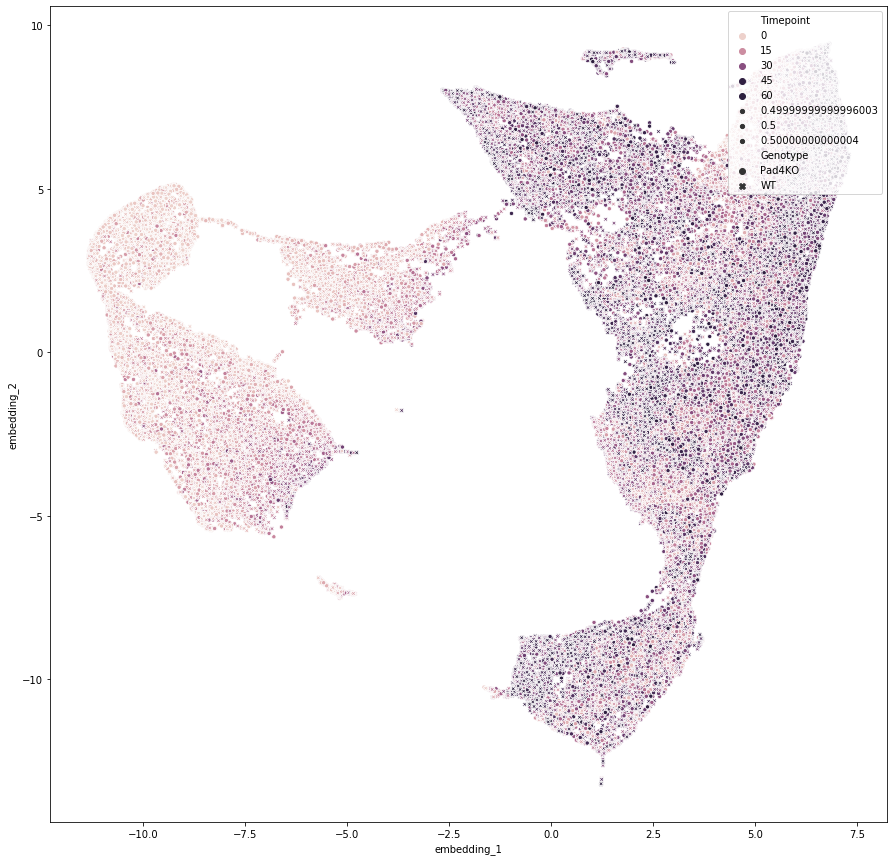

In [93]:
plt.figure(figsize=(15,15))
pallete=sns.color_palette("bright", len(color_labels))
sns.scatterplot(data=curr_df,x="embedding_1", y="embedding_2", hue='Timepoint',
                style="Genotype", size=0.5)
#curr_df.plot.scatter("embedding_1","embedding_2", hue=curr_df['Stimuli'])#.map(color_map),s=0.5)
plt.legend(loc='upper right')

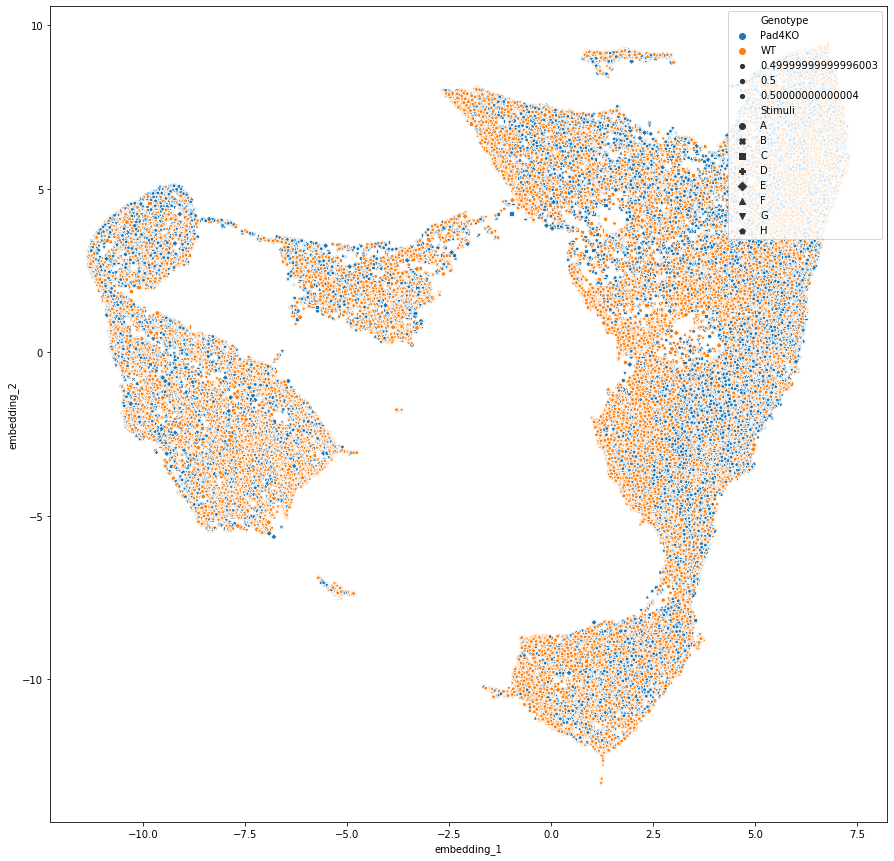

In [95]:
plt.figure(figsize=(15,15))
pallete=sns.color_palette("bright", len(color_labels))
sns.scatterplot(data=curr_df,x="embedding_1", y="embedding_2", hue='Genotype',
                style="Stimuli", size=0.5)
#curr_df.plot.scatter("embedding_1","embedding_2", hue=curr_df['Stimuli'])#.map(color_map),s=0.5)
plt.legend(loc='upper right')